<a href="https://colab.research.google.com/github/yecatstevir/Basic-First-Webpage/blob/master/Project_Healthy_Homes_v3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Project Healthy Homes
We would like to analyze the link between substandard housing and poor health.  In this project, we really have two goals: (1) estimating the number of Americans who likely have a claim against a landlord for substandard housing, and (2) understanding the link between the existence of that substandard housing and the risk of contracting COVID 19. 


 

---



## Exploring AHS Data 
- to find county FIPS and Special Codes
- count different Metro areas in AHS data

One way to link the AHS and COVID-19 datasets is to create a table of geographic values on which to join. Since the AHS dataset has information to unpack within specific codes defined by the authors of the dataset, the table serves as a way to organize the geographic information from the AHS dataset and align it with the values contained in the COVID-19 dataset.

We will take the SMSA and County codes from the AHS dataset and add those to the new table columns: SMSA and countyFIPS. In some cases, there are multiple counties included in the special annotated County codes from AHS. In those cases, we must look the meaning of those values using the code books. This will return to us the counties included in this particular datapoint. Those counties and SMSA codes are added to the table along with the actual FIPS code referenced from https://transition.fcc.gov/oet/info/maps/census/fips/fips.txt


In [0]:
import pandas as pd

#ahs11_1 = pd.read_csv("https://healthyhomes591.s3-us-west-1.amazonaws.com/newhousemet_2011.csv")
ahs17_met_1 = pd.read_csv("https://healthyhomes591.s3-us-west-1.amazonaws.com/household_2017_met.csv")
ahs17_nat_1 = pd.read_csv("https://healthyhomes591.s3-us-west-1.amazonaws.com/AHS_nat_2017.csv")
ahs15_met_1 = pd.read_csv("https://healthyhomes591.s3-us-west-1.amazonaws.com/AHS_2015_met.csv")
ahs13_met_1 = pd.read_csv("https://healthyhomes591.s3-us-west-1.amazonaws.com/AHS_met_2013.csv")
ahs13_nat_1 = pd.read_csv("https://healthyhomes591.s3-us-west-1.amazonaws.com/AHS_nat_2013.csv")

In [24]:
#exploring geography variables for each dataset to help build bridge table. 
sevmet = ahs17_met_1.groupby("OMB13CBSA")["CONTROL"].count()
sevnat = ahs17_nat_1.groupby("OMB13CBSA")["CONTROL"].count()
fivemet = ahs15_met_1.groupby("OMB13CBSA")["CONTROL"].count()
threemet = ahs13_met_1.groupby("SMSA")["CONTROL"].count()
threenat = ahs13_nat_1.groupby("CMSA")["CONTROL"].count()

#print number of potential geography variables
print(len(sevmet))
print(len(sevnat))
print(len(fivemet))
print(len(threemet))
print(len(threenat))

10
17
10
20
15


In [33]:
ahs13_nat_1

,CONTROL,DEGREE,METRO3,REGION,SMSA,LMED,LMEDA,LMEDB,FMR,FMRA,FMRB,L30,L50,L80,L30A,L50A,L80A,L30B,L50B,L80B,IPOV,HISTRY,CMSA,DIVISION,DISH,WASH,DRY,BUYG,BUYE,NUNIT2,BURNER,AMTG,GASPIP,USEGAS,AMTE,USELECT,HFUEL,WFUEL,COOK,OVEN,...,JHHPQSS,JHHPQSSI,JHHPQWELF,JHHPQWKCMP,JHHPVOTHER,JHHSAL,JHHPAR,POOR,HHLDKID,CLPEVA,NEWC,ELDER,NONREL,KIDU18,HHKIDU18,MOVEDLY,PRIN01,DBGRPNUM,DBOUT1WHY,DBOUT1LEN,DBOUT1REAS,DBOUT1WHER,DBOUT1VOL,DBIN1WHY,DBIN1VOL,DBIN1WHER,DBIN1REAS,DBMISSMORT,DBMISSRENT,DBUTBILL,VACANC2B,ISTATUS,AMTI,CAMF,FLRENT,FMHOTF,LRENT,MHOTFE,JBILLW,SUBWGT
0,'100003130103','2','3','1','9999',73738,51700,115300,956,610,1648,15738,26213,40322,11650,19400,31000,25650,42700,54900,11067,'1','99','02','1','1','1','-6','-6','2','-6',39,'1','1',115,'1','2','1','1','-6',...,'-9','-9','-9','-9','2','-9','-9',163,0,-6,'2',1,0,0,0,'1',-6,0,'-6','-6',-6,'-6','-6','2','2','1',4,'-6','-6','3','-6','1',105,12,-6,-6,-6,-6,'1',-6.000000
1,'100003130203','2','3','1','9999',73738,51700,115300,767,451,1327,15738,26213,40322,11650,19400,31000,25650,42700,54900,-6,'1','99','02','-6','-6','-6','-6','-6','-6','-6',-6,'-6','-6',-6,'-6','-6','-6','-6','-6',...,'-9','-9','-9','-9','-9','-9','-9',-6,-6,-6,'2',-6,-6,-6,-6,'-6',-6,-6,'-6','-6',-6,'-6','-6','-6','-6','-6',-6,'-6','-6','-6','-6','4',-6,-6,-6,-6,-6,-6,'-9',-6.000000
2,'100006110140','3','5','3','9999',55846,30700,107300,552,410,1191,12032,20046,32045,9400,15650,25050,22550,37600,46750,-6,'1','99','56','-6','-6','-6','-6','-6','-6','-6',-6,'-6','-6',-6,'-6','-6','-6','-6','-6',...,'-9','-9','-9','-9','-9','-9','-9',-6,-6,-6,'2',-6,-6,-6,-6,'-6',-6,-6,'-6','-6',-6,'-6','-6','-6','-6','-6',-6,'-6','-6','-6','-6','4',-6,-6,-6,-6,-6,-6,'-9',-6.000000
3,'100006110249','3','5','3','9999',55846,30700,107300,1100,748,2374,17165,28604,45744,13400,22350,35750,32200,53650,66750,24218,'1','99','56','1','1','1','-6','-6','1','-6',31,'2','1',181,'1','1','1','1','-6',...,'-9','-9','-9','-9','-9','2','-9',508,2,-6,'2',0,0,1,1,'2',-6,0,'-6','-6',-6,'-6','-6','-6','-6','-6',-6,'-6','-6','3','-6','1',700,-6,-6,-6,-6,-6,'1',-6.000000
4,'100006130103','3','5','3','9999',55846,30700,107300,706,555,1412,12032,20046,32045,9400,15650,25050,22550,37600,46750,-6,'1','99','56','2','2','2','-6','-6','1','-6',-6,'-6','-6',-6,'-6','3','2','1','-6',...,'-9','-9','-9','-9','-9','-9','-9',-6,-6,-6,'2',-6,-6,-6,-6,'-6',-6,-6,'-6','-6',-6,'-6','-6','-6','-6','-6',-6,'-6','-6','-6','-6','3',-6,-6,-6,-6,-6,-6,'-9',-6.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84350,'999900056782','3','2','4','9999',69500,52200,86700,784,560,1018,14850,24740,39151,11700,19500,31150,18200,30350,45100,-6,'8','99','89','2','1','1','-6','-6','1','-6',-6,'-6','-6',-6,'-6','1','1','1','-6',...,'-9','-9','-9','-9','-9','-9','-9',-6,-6,-6,'2',-6,-6,-6,-6,'-6',-6,-6,'-6','-6',-6,'-6','-6','-6','-6','-6',-6,'-6','-6','-6','-6','2',-6,-6,-6,-6,-6,-6,'-9',-6.000000
84351,'999900056783','3','1','2','1640',68700,68700,68700,445,445,445,14450,24050,38500,14450,24050,38500,14450,24050,38500,-6,'8','99','03','2','2','2','-6','-6','1','2',-6,'-6','-6',-6,'-6','2','-6','2','2',...,'-9','-9','-9','-9','-9','-9','-9',-6,-6,-6,'2',-6,-6,-6,-6,'-6',-6,-6,'-6','-6',-6,'-6','-6','-6','-6','-6',-6,'-6','-6','-6','11','3',-6,-6,-6,-6,-6,-6,'-9',-6.000000
84352,'999900056784','5','2','4','3320',86300,86300,86300,2701,2701,2701,23500,39200,62650,23500,39200,62650,23500,39200,62650,15517,'8','99','89','2','1','1','2','2','1','-6',-6,'1','1',-6,'1','9','1','1','-6',...,'-9','-9','-9','-9','-9','-9','-9',258,0,-6,'2',0,0,0,0,'1',-6,1,'2','5',8,'9','3','2','3','3',9,'-6','4','3','-6','1',180,-6,-6,-6,-6,-6,'1',2836.641952
84353,'999900056785','1','1','4','9999',79659,60900,87800,770,610,862,17150,2

In [61]:
#determining metro areas in 2013 national
ahs13_nat_test = ahs13_nat_1[["CONTROL", "SMSA", "CMSA"]]
ahs13_nat_test2 = ahs13_nat_test.loc[(ahs13_nat_test['SMSA'] != "'9999'") & (ahs13_nat_test['CMSA'] != "'99'")]
ahs13_nat_test2.groupby(['CMSA', 'SMSA']).count()
ahs13_nat_test.loc[ahs13_nat_test['CMSA'] == "'99'"]

,CONTROL,SMSA,CMSA
0,'100003130103','9999','99'
1,'100003130203','9999','99'
2,'100006110140','9999','99'
3,'100006110249','9999','99'
4,'100006130103','9999','99'
...,...,...,...
84350,'999900056782','9999','99'
84351,'999900056783','1640','99'
84352,'999900056784','3320','99'
84353,'999900056785','9999','99'


In [0]:
#variables for selecting the columns we wish to use
cond_var_11 = ['EXPOSE', 'ELEV', 'KITCHEN', 'BSINK', 'TOILET', 'TUB', 'HEQUIP', 'REFR', 'SINK', 'BURNER', 'COOK', 'NOWIRE', 'PLUGS', 'NUMBLOW', 'NUMCOLD', 'WHYCD2', 'WHYCD3', 'NUMTLT', 'NUMDRY', 'HOTPIP', 'NUMSEW', 'PLUMB', 'ECRUMB', 'EHOLER', 'EMISSR', 'ESAGR', 'EMISSW', 'ESLOPW', 'EBOARD', 'EBROKE', 'HOLES', 'CRACKS', 'ZADEQ', 'WATERS', 'RATFREQ', 'ROACHFRQ', 'MOLD', 'ASTHEMR', 'MUST', 'SECSMK', 'STAIRRL', 'STAIRMIS', 'STAIRBRK', 'SMOKE']
cond_var_13 = ['EXPOSE', 'ELEV', 'KITCHEN', 'BSINK', 'TOILET', 'TUB', 'HEQUIP', 'REFR', 'SINK', 'BURNER', 'COOK', 'NOWIRE', 'PLUGS', 'NUMBLOW', 'NUMCOLD', 'WHYCD2', 'WHYCD3', 'NUMTLT', 'NUMDRY', 'HOTPIP', 'NUMSEW', 'PLUMB', 'ECRUMB', 'EHOLER', 'EMISSR', 'ESAGR', 'EMISSW', 'ESLOPW', 'EBOARD', 'EBROKE', 'HOLES', 'CRACKS', 'ZADEQ', 'WATERS', 'RATFREQ', 'ROACHFRQ', 'MOLD', 'ASTHEMR', 'MUST', 'SECSMK', 'STAIRRL', 'STAIRMIS', 'STAIRBRK', 'SMOKE']
cond_var_15 = ['COOKTYPE', 'FRIDGE', 'KITCHSINK', 'ASTHEMR', 'MUST', 'SECSMK', 'NOWIRE', 'FUSEBLOW', 'PLUGS', 'ADEQUACY', 'HEATTYPE', 'COLDEQFREQ', 'COLDHTCAP', 'COLDINSUL', 'BATHROOMS', 'BATHEXCLU', 'MOLDKITCH', 'MOLDBATH', 'MOLDBEDRM', 'MOLDLROOM', 'MOLDBASEM', 'MOLDOTHER', 'RODENT', 'ROACH', 'NOTOILFREQ', 'NOWATFREQ', 'SEWBREAK', 'STAIRRL', 'STAIRMIS', 'STAIRBRK', 'FNDCRUMB', 'ROOFHOLE', 'ROOFSHIN', 'ROOFSAG', 'WALLSIDE', 'WALLSLOPE', 'WINBOARD', 'WINBROKE', 'FLOORHOLE', 'WALLCRACK', 'PAINTPEEL', 'HOTWATER', 'WATSAFE']
cond_var_17 = ['SUPP1HEAT', 'SUPP2HEAT', 'COOKTYPE', 'FRIDGE', 'KITCHSINK', 'NOWIRE', 'FUSEBLOW', 'PLUGS', 'ADEQUACY', 'HEATTYPE', 'COLDEQFREQ', 'COLDHTCAP', 'COLDINSUL', 'BATHROOMS', 'BATHEXCLU', 'MOLDKITCH', 'MOLDBATH', 'MOLDBEDRM', 'MOLDLROOM', 'MOLDBASEM', 'MOLDOTHER', 'RODENT', 'ROACH', 'NOTOILFREQ', 'NOWATFREQ', 'SEWBREAK', 'FNDCRUMB', 'ROOFHOLE', 'ROOFSHIN', 'ROOFSAG', 'WALLSIDE', 'WALLSLOPE', 'WINBOARD', 'WINBROKE', 'FLOORHOLE', 'WALLCRACK', 'PAINTPEEL', 'HOTWATER']
location_var_11 = ['SMSA', 'COUNTY', 'STATE'] 
#location_var_13 = []
location_var_15 = ["OMB13CBSA"]
location_var_17 = ["OMB13CBSA"]
rent_var = ['CONTROL', 'TENURE']


In [0]:
#create dataframe with the columns of interest and limit rows to renters
ahs17_2 = ahs17_nat_1[rent_var + location_var_17 + cond_var_17]
ahs17_nat_rent_2 = ahs17_2[ahs17_2['TENURE'] == "'2'"]
#ahs17_nat_rent_2.head()

In [0]:
ahs17_nat_rent_2.shape

(22701, 41)

In [0]:
#create a table that contains the variables of interest, the tresholds relevent to whether the apartment is substandard, and the weights for each variable based on an expert consultation

sur_key = [
  ['SUPP1HEAT', "'01'", 1], ['SUPP1HEAT', "'05'", 1], ['SUPP1HEAT', "'10'", 1], ['SUPP1HEAT', "'11'", 1], ['SUPP2HEAT', "'01'", 1], ['SUPP2HEAT', "'05'", 1], 
  ['SUPP2HEAT', "'10'", 1], ['SUPP2HEAT', "'10'", 1], ['SUPP2HEAT', "'11'", 1], ['COOKTYPE', "'2'", 1], ['COOKTYPE', "'4'", 1], ['FRIDGE', "'2'", 1], 
  ['KITCHSINK', "'2'", 1], ['NOWIRE', "'2'", 1], ['NOWIRE', "'3'", 1], ['FUSEBLOW', "'3'", 1], ['FUSEBLOW', "'4'", 1], ['PLUGS', "'2'", 1], ['ADEQUACY', "'13'", 1],
  ['HEATTYPE', "'14'", 1], ['HEATTYPE', "'07'", 1], ['HEATTYPE', "'08'", 1], ['HEATTYPE', "'09'", 1], ['HEATTYPE', "'10'", 1], ['HEATTYPE', "'11'", 1],
  ['COLDHTCAP', "'1'", 1], ['COLDINSUL', "'1'", 1], ['BATHROOMS', "'07'", 1], ['BATHROOMS', "'08'", 1], ['BATHROOMS', "'09'", 1], 
  ['BATHROOMS', "'10'", 1,], ['BATHROOMS', "'11'", 1], ['BATHROOMS', "'12'", 1], ['BATHROOMS', "'13'", 1], ['BATHEXCLU', "'2'", 1], ['MOLDKITCH', "'1'", 1], 
  ['MOLDBATH', "'1'", 1], ['MOLDBEDRM',  "'1'", 1], ['MOLDLROOM', "'1'", 1], ['MOLDBASEM', "'1'", 1], ['MOLDOTHER', "'1'", 1], ['RODENT', "'1'", 1], ['RODENT', "'2'", 1],
  ['RODENT', "'3'", 1], ['ROACH', "'1'", 1],   ['ROACH', "'2'", 1], ['ROACH', "'3'", 1], ['NOWATFREQ', "'8'", 1], ['SEWBREAK', "'3'", 1], ['SEWBREAK', "'4'", 1], 
  ['FNDCRUMB', "'1'", 1], ['ROOFHOLE', "'1'", 1], ['ROOFSHIN', "'1'", 1], ['ROOFSAG', "'1'", 1], ['WALLSIDE', "'1'", 1], ['WALLSLOPE', "'1'", 1], ['WINBOARD', "'1'", 1], 
  ['WINBROKE', "'1'", 1], ['FLOORHOLE', "'1'", 1], ['WALLCRACK', "'1'", 1], ['PAINTPEEL', "'1'", 1], ['HOTWATER', "'7'", 1]
 ]

mask_data = pd.DataFrame(sur_key, columns = ['Variable', 'Trigger', 'Weight'])

mask_data

,Variable,Trigger,Weight
0,SUPP1HEAT,'01',1
1,SUPP1HEAT,'05',1
2,SUPP1HEAT,'10',1
3,SUPP1HEAT,'11',1
4,SUPP2HEAT,'01',1
...,...,...,...
57,WINBROKE,'1',1
58,FLOORHOLE,'1',1
59,WALLCRACK,'1',1
60,PAINTPEEL,'1',1


In [0]:
#create a callable function that iterates through the rows of mask_data to create and apply the indivdual masks for the relevant variables

def masking_func(df):
  for i in range(len(mask_data)): 
    df[mask_data.iloc[i]['Variable']].mask(df[mask_data.iloc[i]['Variable']] == mask_data.iloc[i]['Trigger'], mask_data.iloc[i]['Weight'], inplace=True)
  return df
  
ahs17_nat_rent_3 = masking_func(ahs17_nat_rent_2)
ahs17_nat_rent_3.head()

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:8765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


,CONTROL,TENURE,OMB13CBSA,SUPP1HEAT,SUPP2HEAT,COOKTYPE,FRIDGE,KITCHSINK,NOWIRE,FUSEBLOW,PLUGS,ADEQUACY,HEATTYPE,COLDEQFREQ,COLDHTCAP,COLDINSUL,BATHROOMS,BATHEXCLU,MOLDKITCH,MOLDBATH,MOLDBEDRM,MOLDLROOM,MOLDBASEM,MOLDOTHER,RODENT,ROACH,NOTOILFREQ,NOWATFREQ,SEWBREAK,FNDCRUMB,ROOFHOLE,ROOFSHIN,ROOFSAG,WALLSIDE,WALLSLOPE,WINBOARD,WINBROKE,FLOORHOLE,WALLCRACK,PAINTPEEL,HOTWATER
5,'11000008','2','99998','14','14','1','1','1','1','1','1','1','01',-6,'-6','-6','01','-6','2','2','2','2','2','2','5','5',-6,'1','6','-6','-6','-6','-6','-6','-6','-6','-6','2','2','2','1'
7,'11000010','2','99998','14','14','1','1','1','1','6','1','1','01',-6,'-6','-6','02','-6','2','2','2','2','2','2','5','5',-6,'-6','6','2','2','2','2','2','2','2','2','2','2','2','2'
8,'11000012','2','99998','14','14','1','1','1','1','6','1','1','01',-6,'-6','-6','01','-6','2','2','2','2','2','2','5','5',-6,'-6','6','-6','-6','-6','-6','-6','-6','-6','-6','2','2','2','1'
13,'11000018','2','99998','14','14','1','1','1','1','6','1','2','04',-6,'-6','-6','01','-6','2','2','2','2','2','2',1,'4',-6,'-6','6','-6','-6','-6','-6','-6','-6','-6','-6','2',1,'2','1'
14,'11000019','2','99998','14','14','1','1','1','1','6','1','1','02',-6,'-6','-6','01','-6','2','2','2','2','2','2','5','5',-6,'-6','6','-6','-6','-6','-6','-6','-6','-6','-6','2','2','2','1'


In [0]:
#finish the mask

#use a short generic reference to ahs data so it can be repurposed for each year easily
ahs = ahs17_nat_rent_3

#replace all remaining data with 0s
cols = cond_var_17
mask = ahs[cols].applymap(lambda x: isinstance(x, int))
ahs[cols] = ahs[cols].where(mask)
ahs = ahs.fillna(0)
ahs[cols] = ahs[cols].apply(pd.to_numeric)

#get rid of negative numbers that represent NA
ahs[cols] = ahs[cols].where(ahs[cols] > 0, 0)

#handling false outliers; special cases
#apply mask, if value does not equal 8 , then set it to equal 0
special_col = ['COLDEQFREQ', 'NOTOILFREQ']
special_mask = ahs[special_col].isin([8])
ahs[special_col] = ahs[special_col].where(special_mask, other = 0)

#reapply the mask to change value of 8 to the value of 1; we could not do this previously since we wanted to turn original values containing 1 into value 0
#set values that are not 8 to FALSE then take the inverse of that, so where values are TRUE set to value 1
special_mask2 = ahs[special_col].isin([8])
ahs[special_col] = ahs[special_col].where(~special_mask2, other = 1)
#c['COLDEQFREQ'].unique()

#then creat a new column for the total violations; we can then filter by number of violations
ahs['Total Violations'] = ahs[cols].sum(axis=1)
ahs.head()

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


,CONTROL,TENURE,OMB13CBSA,SUPP1HEAT,SUPP2HEAT,COOKTYPE,FRIDGE,KITCHSINK,NOWIRE,FUSEBLOW,PLUGS,ADEQUACY,HEATTYPE,COLDEQFREQ,COLDHTCAP,COLDINSUL,BATHROOMS,BATHEXCLU,MOLDKITCH,MOLDBATH,MOLDBEDRM,MOLDLROOM,MOLDBASEM,MOLDOTHER,RODENT,ROACH,NOTOILFREQ,NOWATFREQ,SEWBREAK,FNDCRUMB,ROOFHOLE,ROOFSHIN,ROOFSAG,WALLSIDE,WALLSLOPE,WINBOARD,WINBROKE,FLOORHOLE,WALLCRACK,PAINTPEEL,HOTWATER,Total Violations
5,'11000008','2','99998',0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,'11000010','2','99998',0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,'11000012','2','99998',0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
13,'11000018','2','99998',0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,2
14,'11000019','2','99998',0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [0]:
#let's look at just the rows ansd columns with numbers

ahs17_nat_rent_sub = ahs[ahs['Total Violations'] > 0]
ahs17_nat_rent_sub.loc[:, (ahs17_nat_rent_sub != 0).any(axis=0)]
ahs17_nat_rent_sub.head()

,CONTROL,TENURE,OMB13CBSA,SUPP1HEAT,SUPP2HEAT,COOKTYPE,FRIDGE,KITCHSINK,NOWIRE,FUSEBLOW,PLUGS,ADEQUACY,HEATTYPE,COLDEQFREQ,COLDHTCAP,COLDINSUL,BATHROOMS,BATHEXCLU,MOLDKITCH,MOLDBATH,MOLDBEDRM,MOLDLROOM,MOLDBASEM,MOLDOTHER,RODENT,ROACH,NOTOILFREQ,NOWATFREQ,SEWBREAK,FNDCRUMB,ROOFHOLE,ROOFSHIN,ROOFSAG,WALLSIDE,WALLSLOPE,WINBOARD,WINBROKE,FLOORHOLE,WALLCRACK,PAINTPEEL,HOTWATER,Total Violations
13,'11000018','2','99998',0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,2
16,'11000022','2','99998',0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
27,'11000038','2','99998',0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,3
46,'11000060','2','99998',0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
65,'11000083','2','47900',0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [0]:
ahs17_nat_rent_sub.shape

(7701, 42)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


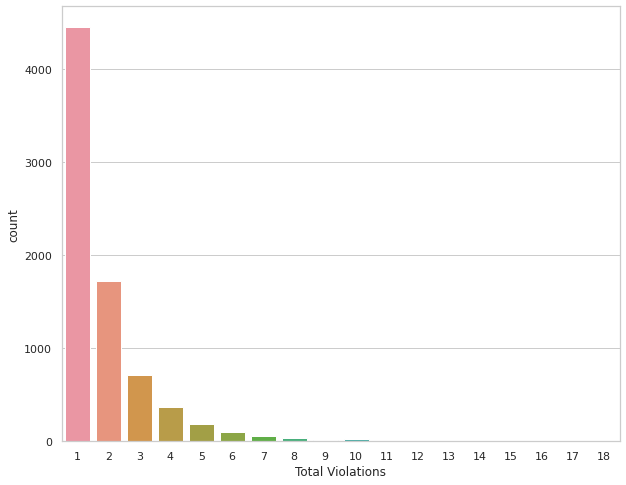

In [0]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize =(10,8))

sns.set(style="whitegrid")

ax = sns.countplot(x="Total Violations", data=ahs17_nat_rent_sub)

In [0]:
#let's count the number of apartments surveyed in each metro area
left_df_17 = ahs17_nat_rent_2.groupby(['OMB13CBSA'])['CONTROL'].count()
left_df_17

OMB13CBSA
'12060'     781
'14460'     764
'16980'     695
'19100'    1074
'19820'     612
'26420'     864
'31080'    1377
'33100'     860
'35620'    1112
'37980'     646
'38060'     735
'40140'     783
'41860'     958
'42660'     913
'47900'     893
'99998'    7980
'99999'    1654
Name: CONTROL, dtype: int64

In [0]:
#let's count the number of substandrad apartments in each metro area
right_df_17 = ahs17_nat_rent_sub.groupby(['OMB13CBSA'])['CONTROL'].count()
right_df_17

OMB13CBSA
'12060'     278
'14460'     194
'16980'     196
'19100'     392
'19820'     169
'26420'     377
'31080'     521
'33100'     326
'35620'     417
'37980'     213
'38060'     223
'40140'     261
'41860'     341
'42660'     263
'47900'     263
'99998'    2668
'99999'     599
Name: CONTROL, dtype: int64

In [0]:
#now merge the two dataframes so we can calculate the percent of substandard housing by MSA

ahs17_nat_rent_sub_tot = pd.merge(left_df_17, right_df_17, on='OMB13CBSA', how='outer')
ahs17_nat_rent_sub_tot['Percent Violative'] = ahs17_nat_rent_sub_tot['CONTROL_y'] / ahs17_nat_rent_sub_tot['CONTROL_x']
ahs17_nat_rent_sub_tot

,CONTROL_x,CONTROL_y,Percent Violative
OMB13CBSA,,,
'12060',781,278,0.355954
'14460',764,194,0.253927
'16980',695,196,0.282014
'19100',1074,392,0.364991
'19820',612,169,0.276144
'26420',864,377,0.436343
'31080',1377,521,0.378359
'33100',860,326,0.379070
'35620',1112,417,0.375000


In [0]:
#now we need to add data from another data set that has the total number of apartment units in there metro areas, 
#then multiply by these percents to get the total number of substandard apartnents by metro area

In [0]:
#handling false outliers; special cases
#apply mask, if value does not equal 8 , then set it to equal 0
special_col = ['COLDEQFREQ', 'NOTOILFREQ']
special_mask = c[special_col].isin([8])
c[special_col] = c[special_col].where(special_mask, other = 0)

#reapply the mask to change value of 8 to the value of 1; we could not do this previously since we wanted to turn original values containing 1 into value 0
#set values that are not 8 to FALSE then take the inverse of that, so where values are TRUE set to value 1
special_mask2 = c[special_col].isin([8])
c[special_col] = c[special_col].where(~special_mask2, other = 1)
#c['COLDEQFREQ'].unique()
c

,CONTROL,TENURE,OMB13CBSA,SUPP1HEAT,SUPP2HEAT,COOKTYPE,FRIDGE,KITCHSINK,NOWIRE,FUSEBLOW,PLUGS,ADEQUACY,HEATTYPE,COLDEQFREQ,COLDHTCAP,COLDINSUL,BATHROOMS,BATHEXCLU,MOLDKITCH,MOLDBATH,MOLDBEDRM,MOLDLROOM,MOLDBASEM,MOLDOTHER,RODENT,ROACH,NOTOILFREQ,NOWATFREQ,SEWBREAK,FNDCRUMB,ROOFHOLE,ROOFSHIN,ROOFSAG,WALLSIDE,WALLSLOPE,WINBOARD,WINBROKE,FLOORHOLE,WALLCRACK,PAINTPEEL,HOTWATER,Total Violations
5,'11000008','2','99998',0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,'11000010','2','99998',0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,'11000012','2','99998',0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
13,'11000018','2','99998',0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,2
14,'11000019','2','99998',0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66725,'11086991','2','33100',0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
66733,'11087002','2','33100',0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
66735,'11087004','2','99998',0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
66737,'11087009','2','33100',1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [0]:
#test case; try to get this to work for 2017 national

import numpy as np

c = ahs17_nat_rent_2
# variables are 'COOKTYPE', 'FRIDGE', 'KITCHSINK', 'NOWIRE', 'FUSEBLOW', 'PLUGS', 'ADEQUACY', 'HEATTYPE', 'COLDEQFREQ', 'COLDHTCAP', 'COLDINSUL', 'BATHROOMS', 'BATHEXCLU', 'MOLDKITCH', 
#'MOLDBATH', 'MOLDBEDRM', 'MOLDLROOM', 'MOLDBASEM', 'MOLDOTHER', 'RODENT', 'ROACH', 'NOTOILFREQ', 'NOWATFREQ', 'SEWBREAK', 'FNDCRUMB', 'ROOFHOLE', 'ROOFSHIN', 'ROOFSAG', 'WALLSIDE', 
#'WALLSLOPE', 'WINBOARD', 'WINBROKE', 'FLOORHOLE', 'WALLCRACK', 'PAINTPEEL', 'HOTWATER'
c['SUPP1HEAT'].mask(c['SUPP1HEAT'] == "'01'", 1, inplace=True)
c['SUPP1HEAT'].mask(c['SUPP1HEAT'] == "'05'", 1, inplace=True)
c['SUPP1HEAT'].mask(c['SUPP1HEAT'] == "'10'", 1, inplace=True)
c['SUPP1HEAT'].mask(c['SUPP1HEAT'] == "'11'", 1, inplace=True)
c['SUPP2HEAT'].mask(c['SUPP2HEAT'] == "'01'", 1, inplace=True)
c['SUPP2HEAT'].mask(c['SUPP2HEAT'] == "'05'", 1, inplace=True)
c['SUPP2HEAT'].mask(c['SUPP2HEAT'] == "'10'", 1, inplace=True)
c['SUPP2HEAT'].mask(c['SUPP2HEAT'] == "'11'", 1, inplace=True)
c['COOKTYPE'].mask(c['COOKTYPE'] == "'2'", 1, inplace=True)
c['COOKTYPE'].mask(c['COOKTYPE'] == "'4'", 1, inplace=True)
c['FRIDGE'].mask(c['FRIDGE'] == "'2'", 1, inplace=True)
c['KITCHSINK'].mask(c['KITCHSINK'] == "'2'", 1, inplace=True)
c['NOWIRE'].mask(c['NOWIRE'] == "'2'", 1, inplace=True)
c['NOWIRE'].mask(c['NOWIRE'] == "'3'", 1, inplace=True)
c['FUSEBLOW'].mask(c['FUSEBLOW'] == "'3'", 1, inplace=True)
c['FUSEBLOW'].mask(c['FUSEBLOW'] == "'4'", 1, inplace=True)
c['PLUGS'].mask(c['PLUGS'] == "'2'", 1, inplace=True)
c['ADEQUACY'].mask(c['ADEQUACY'] == "'13'", 1, inplace=True)
c['HEATTYPE'].mask(c['HEATTYPE'] == "'14'", 1, inplace=True)
c['HEATTYPE'].mask(c['HEATTYPE'] == "'07'", 1, inplace=True)
c['HEATTYPE'].mask(c['HEATTYPE'] == "'08'", 1, inplace=True)
c['HEATTYPE'].mask(c['HEATTYPE'] == "'09'", 1, inplace=True)
c['HEATTYPE'].mask(c['HEATTYPE'] == "'10'", 1, inplace=True)
c['HEATTYPE'].mask(c['HEATTYPE'] == "'11'", 1, inplace=True)
#c['COLDEQFREQ'].mask(c['COLDEQFREQ'] == "'8'", 1, inplace=True)
c['COLDHTCAP'].mask(c['COLDHTCAP'] == "'1'", 1, inplace=True)
c['COLDINSUL'].mask(c['COLDINSUL'] == "'1'", 1, inplace=True)
c['BATHROOMS'].mask(c['BATHROOMS'] == "'07'", 1, inplace=True)
c['BATHROOMS'].mask(c['BATHROOMS'] == "'08'", 1, inplace=True)
c['BATHROOMS'].mask(c['BATHROOMS'] == "'09'", 1, inplace=True)
c['BATHROOMS'].mask(c['BATHROOMS'] == "'10'", 1, inplace=True)
c['BATHROOMS'].mask(c['BATHROOMS'] == "'11'", 1, inplace=True)
c['BATHROOMS'].mask(c['BATHROOMS'] == "'12'", 1, inplace=True)
c['BATHROOMS'].mask(c['BATHROOMS'] == "'13'", 1, inplace=True)
c['BATHEXCLU'].mask(c['BATHEXCLU'] == "'2'", 1, inplace=True)
c['MOLDKITCH'].mask(c['MOLDKITCH'] == "'1'", 1, inplace=True)
c['MOLDBATH'].mask(c['MOLDBATH'] == "'1'", 1, inplace=True)
c['MOLDBEDRM'].mask(c['MOLDBEDRM'] == "'1'", 1, inplace=True)
c['MOLDLROOM'].mask(c['MOLDLROOM'] == "'1'", 1, inplace=True)
c['MOLDBASEM'].mask(c['MOLDBASEM'] == "'1'", 1, inplace=True)
c['MOLDOTHER'].mask(c['MOLDOTHER'] == "'1'", 1, inplace=True)
c['RODENT'].mask(c['RODENT'] == "'1'", 1, inplace=True)
c['RODENT'].mask(c['RODENT'] == "'2'", 1, inplace=True)
c['RODENT'].mask(c['RODENT'] == "'3'", 1, inplace=True)
c['ROACH'].mask(c['ROACH'] == "'1'", 1, inplace=True)
c['ROACH'].mask(c['ROACH'] == "'2'", 1, inplace=True)
c['ROACH'].mask(c['ROACH'] == "'3'", 1, inplace=True)
#c['NOTOILFREQ'].mask(c['NOTOILFREQ'] == "'8'", 1, inplace=True)
c['NOWATFREQ'].mask(c['NOWATFREQ'] == "'8'", 1, inplace=True)
c['SEWBREAK'].mask(c['SEWBREAK'] == "'3'", 1, inplace=True)
c['SEWBREAK'].mask(c['SEWBREAK'] == "'4'", 1, inplace=True)
c['FNDCRUMB'].mask(c['FNDCRUMB'] == "'1'", 1, inplace=True)
c['ROOFHOLE'].mask(c['ROOFHOLE'] == "'1'", 1, inplace=True)
c['ROOFSHIN'].mask(c['ROOFSHIN'] == "'1'", 1, inplace=True)
c['ROOFSAG'].mask(c['ROOFSAG'] == "'1'", 1, inplace=True)
c['WALLSIDE'].mask(c['WALLSIDE'] == "'1'", 1, inplace=True)
c['WALLSLOPE'].mask(c['WALLSLOPE'] == "'1'", 1, inplace=True)
c['WINBOARD'].mask(c['WINBOARD'] == "'1'", 1, inplace=True)
c['WINBROKE'].mask(c['WINBROKE'] == "'1'", 1, inplace=True)
c['FLOORHOLE'].mask(c['FLOORHOLE'] == "'1'", 1, inplace=True)
c['WALLCRACK'].mask(c['WALLCRACK'] == "'1'", 1, inplace=True)
c['PAINTPEEL'].mask(c['PAINTPEEL'] == "'1'", 1, inplace=True)
c['HOTWATER'].mask(c['HOTWATER'] == "'7'", 1, inplace=True)

#then put nan wherever there is no integer
cols = cond_var_17
mask = c[cols].applymap(lambda x: isinstance(x, int))
c[cols] = c[cols].where(mask)
c = c.fillna(0)
c[cols] = c[cols].apply(pd.to_numeric)

#get rid of negative numbers that represent NA
c[cols] = c[cols].where(c[cols] > 0, 0)

#then creat a new column for the total violations; we can then filter by number of violations
c['Total Violations'] = c[cols].sum(axis=1)
c

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:8765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)
/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


,CONTROL,TENURE,OMB13CBSA,SUPP1HEAT,SUPP2HEAT,COOKTYPE,FRIDGE,KITCHSINK,NOWIRE,FUSEBLOW,PLUGS,ADEQUACY,HEATTYPE,COLDEQFREQ,COLDHTCAP,COLDINSUL,BATHROOMS,BATHEXCLU,MOLDKITCH,MOLDBATH,MOLDBEDRM,MOLDLROOM,MOLDBASEM,MOLDOTHER,RODENT,ROACH,NOTOILFREQ,NOWATFREQ,SEWBREAK,FNDCRUMB,ROOFHOLE,ROOFSHIN,ROOFSAG,WALLSIDE,WALLSLOPE,WINBOARD,WINBROKE,FLOORHOLE,WALLCRACK,PAINTPEEL,HOTWATER,Total Violations
5,'11000008','2','99998',0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,'11000010','2','99998',0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,'11000012','2','99998',0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
13,'11000018','2','99998',0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,2
14,'11000019','2','99998',0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66725,'11086991','2','33100',0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
66733,'11087002','2','33100',0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
66735,'11087004','2','99998',0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
66737,'11087009','2','33100',1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [0]:
#get and visualize unique county IDs for unique SMSA IDs to help build bridge table
grouping_codes = ahs11_1.groupby('SMSA').apply(lambda x: x['COUNTY'].unique())
grouping_codes.apply(pd.Series)
 

#Fetching Covid Data

API source documentation: https://github.com/jdaio/covid-19-data-api

In [137]:
#get covid County data API from Johns Hopkins server, lic by MIT
import requests

#response = requests.get('https://api.covid19data.cloud/v1/jh/daily-reports/?limit=503507&last_update_to=2020-04-23&country=US')
response = requests.get('https://covid-hotline-bling.herokuapp.com/dataallfips')
response.status_code
cov_api_data = response.json()
response.content

b'[{"date":"2020-04-24","county":"Snohomish","state":"Washington","fips":"53061","cases":2267,"deaths":102},{"date":"2020-04-24","county":"Cook","state":"Illinois","fips":"17031","cases":27616,"deaths":1220},{"date":"2020-04-24","county":"Orange","state":"California","fips":"06059","cases":1845,"deaths":36},{"date":"2020-04-24","county":"Maricopa","state":"Arizona","fips":"04013","cases":3116,"deaths":120},{"date":"2020-04-24","county":"Los Angeles","state":"California","fips":"06037","cases":18545,"deaths":850},{"date":"2020-04-24","county":"Santa Clara","state":"California","fips":"06085","cases":2018,"deaths":99},{"date":"2020-04-24","county":"Suffolk","state":"Massachusetts","fips":"25025","cases":10724,"deaths":372},{"date":"2020-04-24","county":"San Francisco","state":"California","fips":"06075","cases":1343,"deaths":22},{"date":"2020-04-24","county":"Dane","state":"Wisconsin","fips":"55025","cases":395,"deaths":21},{"date":"2020-04-24","county":"San Diego","state":"California","

Get population data from Census [API Data](https://www.census.gov/data/developers/data-sets/popest-popproj/popest.html)

In [138]:
import requests

response2 = requests.get('https://api.census.gov/data/2019/pep/population?get=POP&for=COUNTY:*&key=aca6db39be2278f8b6efe306a8af5a636ab2c75f')
response2.status_code
population = response2.json()
#population
response2.content


b'[["POP","state","county"],\n["55869","01","001"],\n["223234","01","003"],\n["24686","01","005"],\n["22394","01","007"],\n["57826","01","009"],\n["10101","01","011"],\n["19448","01","013"],\n["113605","01","015"],\n["33254","01","017"],\n["26196","01","019"],\n["44428","01","021"],\n["12589","01","023"],\n["23622","01","025"],\n["13235","01","027"],\n["14910","01","029"],\n["52342","01","031"],\n["55241","01","033"],\n["12067","01","035"],\n["10663","01","037"],\n["37049","01","039"],\n["13772","01","041"],\n["83768","01","043"],\n["49172","01","045"],\n["37196","01","047"],\n["71513","01","049"],\n["81209","01","051"],\n["36633","01","053"],\n["102268","01","055"],\n["16302","01","057"],\n["31362","01","059"],\n["26271","01","061"],\n["8111","01","063"],\n["14651","01","065"],\n["17205","01","067"],\n["105882","01","069"],\n["51626","01","071"],\n["658573","01","073"],\n["13805","01","075"],\n["92729","01","077"],\n["32924","01","079"],\n["164542","01","081"],\n["98915","01","083"],\

# Accessing Database
We can set up the database with postgresql and the files later. Need to finish configuring. 

In [139]:
!pip install psycopg2-binary

In [0]:
import psycopg2 as ps #imports postgresql module for python 

In [172]:
#set up parameters for database
host_name = 'project-healthy-homes-591-592.ca2sql2ijmbo.us-west-1.rds.amazonaws.com'
dbname = 'myDatabase'
port = '5439'
user_name = 'masterlogin591' #master username 
pwd = 'postgresql591592' #database password 

try:
    conn = ps.connect(host = host_name,database = dbname,user = user_name,password = pwd,port = port)

except ps.OperationalError as e:
    raise e
else:
    print('Connected!')
    
cur = conn.cursor()
#conn = ps.connect('postgresql://{username}:{password}@{ipaddress}:{port}/{dbname}'.format(username=user_name, password=pwd, ipaddress=host_name, port=port, dbname=dbname))

Connected!


Create covid-19 table

In [0]:
#create covid table and insert columns of interest
#reset the table
cur.execute("DROP TABLE covid;")
conn.commit()

cur.execute("CREATE TABLE covid (cases INTEGER, county VARCHAR, date DATE, fips VARCHAR, state VARCHAR);")

fields = ['cases','county', 'date','fips','state']
          
for items in cov_api_data:
  sql_data = [items[field] for field in fields]
  cur.execute("INSERT INTO covid VALUES (%s, %s, %s, %s, %s)", tuple(sql_data))

conn.commit()

In [0]:
#USE ONLY WHEN NEEDED** for mistakes/errors**, rollback cell to take step back 
cur.execute("rollback;")
conn.commit()
conn.close()

In [175]:
#Check covid table values to make sure table populated correctly
fetch_q = "select * from covid"
cur.execute(fetch_q)
list_tb = cur.fetchall()
"""
for name in list_tb:
  print("cases: ", name[0])
  print("county: ", name[1])
  print("date: ", name[2])
  print("fips: ", name[3])
  print("state: ", name[4], "\n")
  
#conn.close()"""

'\nfor name in list_tb:\n  print("cases: ", name[0])\n  print("county: ", name[1])\n  print("date: ", name[2])\n  print("fips: ", name[3])\n  print("state: ", name[4], "\n")\n  \n#conn.close()'

Create population table

In [0]:
#create a population table
cur.execute("DROP TABLE population;")
conn.commit()
cur.execute("CREATE TABLE population (POP INT, state VARCHAR, county VARCHAR);")

#get column header
temp_pop = population
pop_header = temp_pop.pop(0) #header

#populate table
sql_statement = "INSERT INTO population VALUES (%s, %s, %s)"
cur.executemany(sql_statement, tuple(temp_pop))

#concat state and county columns into a new column fips for later join with covid
cur.execute("ALTER TABLE population ALTER state type VARCHAR using concat(state, county);")
cur.execute("ALTER TABLE population RENAME state to fips;")
cur.execute("ALTER TABLE population drop county;")

conn.commit()

In [0]:
#check population table values to make sure values were inserted properly and concat worked
fetch_all_pop = "select * from population"
cur.execute(fetch_all_pop)
list_to_check = cur.fetchall()

#for value in list_to_check:
  #print("Population: ", value[0])
  #print("fips: ", value[1], "\n")

conn.commit()
#conn.close()

Now we will need to merge covid with county population data.  Will set up a table to read in the population data, then merge the covid table with population table, then read sql to pandas df. 

In [0]:
cur.execute("SELECT * INTO covid2 FROM covid NATURAL LEFT JOIN population;")
conn.commit() 

In [0]:
#check new covid table values after the merge
fetch_all_cov = "select * from covid2"
cur.execute(fetch_all_cov)
check_new_merge = cur.fetchall()

#for item in check_new_merge:
  #fips, cases, county, date, state, population
  #print(item)

conn.commit()
conn.close()

In [173]:
#read table into pandas df
import pandas as pd
sql = "SELECT * FROM covid2"
covid_df1 = pd.read_sql_query(sql, conn)
covid_df1

,fips,cases,county,date,state,pop
0,01001,36,Autauga,2020-04-24,Alabama,55869
1,01003,147,Baldwin,2020-04-24,Alabama,223234
2,01005,32,Barbour,2020-04-24,Alabama,24686
3,01007,34,Bibb,2020-04-24,Alabama,22394
4,01009,31,Blount,2020-04-24,Alabama,57826
...,...,...,...,...,...,...
2793,56035,1,Sublette,2020-04-24,Wyoming,9831
2794,56037,10,Sweetwater,2020-04-24,Wyoming,42343
2795,56039,64,Teton,2020-04-24,Wyoming,23464
2796,56041,6,Uinta,2020-04-24,Wyoming,20226


###Bridge Table
This section is outdated.  Needs to be updated, revised

In [0]:
#County population totals as of end of 2019
cov_county_1 = pd.read_csv("https://healthyhomes591.s3-us-west-1.amazonaws.com/covid_county_population_usafacts.csv")
cov_county_1.head()

In [0]:
#test bridge dataset with covid and ahs
import pandas as pd
test_bridge_1 = pd.read_csv("https://healthyhomes591.s3-us-west-1.amazonaws.com/FIPS_to_SMSA.csv")
test_bridge_1.head()

In [0]:
#Test merge covid cases with the bridge
test_bridge_2 = test_bridge_1.merge(cov_case_1, how = "left")
test_bridge_2.head()

In [0]:
#test merge the AHS11_2 dataset with test_bridge_2
test_bridge_3 = test_bridge_2.merge(ahs11_2, how = "left")
test_bridge_3.sample(5)

In [0]:
test_bridge_3['County Name'].unique()
print(len(test_bridge_3["CONTROL"].unique()))
print(len(test_bridge_3))

In [0]:
#double check merge, should get redundant CONTROL codes due to certain CONTROL
#rows having multiple counties, sum county cases (should be same for all three counties)
smsa1000_control = test_bridge_3.loc[test_bridge_3['CONTROL'] == "'100000000002'"]
smsa1000_control["COVID_CASES"] = smsa1000_control["4/11/2020"].sum()
smsa1000_control

In [0]:
#test 
smsa1000_control.groupby("CONTROL")["4/11/2020"].sum()


In [0]:
print(covid_list)

[{'date': '2020-04-23', 'county': 'Snohomish', 'state': 'Washington', 'fips': '53061', 'cases': 2239, 'deaths': 99}, {'date': '2020-04-23', 'county': 'Cook', 'state': 'Illinois', 'fips': '17031', 'cases': 25811, 'deaths': 1142}, {'date': '2020-04-23', 'county': 'Orange', 'state': 'California', 'fips': '06059', 'cases': 1827, 'deaths': 36}, {'date': '2020-04-23', 'county': 'Maricopa', 'state': 'Arizona', 'fips': '04013', 'cases': 2970, 'deaths': 115}, {'date': '2020-04-23', 'county': 'Los Angeles', 'state': 'California', 'fips': '06037', 'cases': 17508, 'deaths': 797}, {'date': '2020-04-23', 'county': 'Santa Clara', 'state': 'California', 'fips': '06085', 'cases': 1987, 'deaths': 96}, {'date': '2020-04-23', 'county': 'Suffolk', 'state': 'Massachusetts', 'fips': '25025', 'cases': 9739, 'deaths': 346}, {'date': '2020-04-23', 'county': 'San Francisco', 'state': 'California', 'fips': '06075', 'cases': 1305, 'deaths': 21}, {'date': '2020-04-23', 'county': 'Dane', 'state': 'Wisconsin', 'fips'